## Homework

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from pprint import pprint

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail?

In [2]:
df = pd.read_csv('./resources/housing.csv')

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

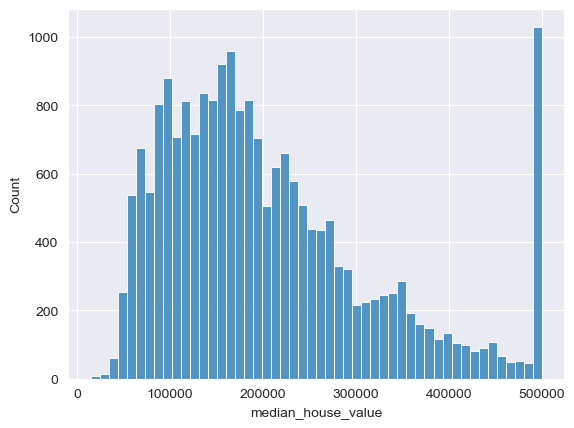

In [3]:
sns.histplot(df, x='median_house_value', bins=50)

It doesn't look like the variable `median_house_value` has a long tail.

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [4]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
         'population', 'households', 'median_income', 'median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [5]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The `total_bedrooms` feature has 207 missing values.

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

In [6]:
df['population'].median()

1166.0

The `population` feature has a median of 1166.

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [7]:
# Set seed
np.random.seed(42)

In [8]:
# Define split ratio
p_val = 0.2
p_test = 0.2
p_train = 0.6

assert p_train + p_val + p_test == 1, 'Invalid split.'

p_train, p_val, p_test

(0.6, 0.2, 0.2)

In [9]:
# Define lengths
n = len(df)
n_val = int(n * p_val)
n_test = int(n * p_test)
n_train = n - n_val - n_test

assert n_train + n_val + n_test == n, 'Invalid split.'

n_train, n_val, n_test

(12384, 4128, 4128)

In [10]:
# Shuffle dataframe index
idx = np.arange(n)
np.random.shuffle(idx)

idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [11]:
# Shuffle the dataframe
df_shuffled = df.iloc[idx]
df_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [12]:
# Split the original dataframe into one dataframe for each step (train, validation, test)
df_train = df_shuffled.iloc[:n_train].copy()
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [13]:
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19660,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
4415,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
18113,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
17673,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
16992,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0
...,...,...,...,...,...,...,...,...,...
20011,36.05,-119.12,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0
12225,33.65,-116.90,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0
1051,38.34,-120.71,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0
14519,32.91,-117.13,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0


In [14]:
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9221,37.13,-120.26,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
10234,33.86,-117.91,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
4763,34.04,-118.36,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
9062,34.69,-118.15,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
1874,38.93,-119.97,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [15]:
# Extract the target feature from the datasets
y_train = np.log1p(df_train['median_house_value'].values)
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [16]:
y_val = np.log1p(df_val['median_house_value'].values)
y_val

array([11.4414402 , 12.15162174, 12.74081302, ..., 11.87965667,
       11.9492495 , 11.97540713])

In [17]:
y_test = np.log1p(df_test['median_house_value'].values)
y_test

array([10.98191414, 12.01854355, 11.84510995, ..., 12.31088751,
       12.55497093, 12.69158354])

In [18]:
# Remove target features from their datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [19]:
# Define generic shuffle and split function
def shuffle_and_split(df: pd.DataFrame,
                      seed = 42,
                      p_train: float = 0.6,
                      p_val: float = 0.2,
                      p_test: float = 0.2,
                      filler: str | None = 'zero'):

    # Work out split values
    assert p_train + p_val + p_test == 1, 'Invalid split.'
    n = len(df)
    n_val = int(n * p_val)
    n_test = int(n * p_test)
    n_train = n - n_val - n_test

    # Shuffle
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    # Split
    df_shuffled = df.iloc[idx]
    df_train = df_shuffled[:n_train].copy()
    df_val = df_shuffled[n_train:n_train+n_val].copy()
    df_test = df_shuffled[n_train+n_val:].copy()

    # Fill nulls
    if filler == 'zero':
        # Fill with zeros
        df_train.fillna(0, inplace=True)
        df_val.fillna(0, inplace=True)
        df_test.fillna(0, inplace=True)
    elif filler == 'mean':
        # Fill with train dataset mean value
        df_mean = df_train.mean()
        df_train.fillna(df_mean, inplace=True)
        df_val.fillna(df_mean, inplace=True)
        df_test.fillna(df_mean, inplace=True)
    else:
        # Unhandled
        print(f"Unhandled filler '{filler}'.")
        pass

    df_train.drop('median_house_value', axis=1).head(5)

    # Extract features
    X_train = df_train.drop('median_house_value', axis=1).values
    X_val = df_val.drop('median_house_value', axis=1).values
    X_test = df_test.drop('median_house_value', axis=1).values

    # Extract targets
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    # Return features and targets
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
# Define linear regression training function
def train(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]

In [21]:
# Define function to get RMSE on a prediction
def rmse(y, y_pred) -> float:
    error = y_pred - y
    mse = (error ** 2).mean()

    return np.sqrt(mse)

In [22]:
# Define function to compare target and prediction visually (from the course notebook)
def plot_compare(values, predictions):
    plt.figure(figsize=(6, 4))

    sns.histplot(values, label='target', color='#222222', alpha=0.6, bins=40)
    sns.histplot(predictions, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

    plt.legend()

    plt.ylabel('Frequency')
    plt.xlabel('Log(Price + 1)')
    plt.title('Predictions vs actual distribution')

    plt.show()

0.33 (0.3295330365225666)


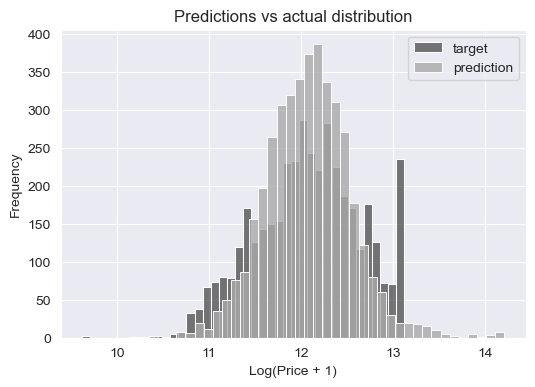

0.33 (0.3290195439006052)


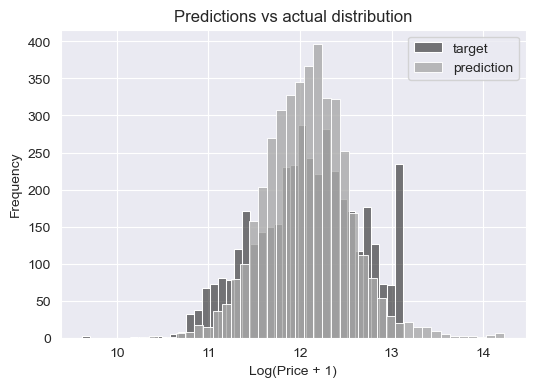

In [23]:
# Run experiments
for f in ['zero', 'mean']:
    # Prep
    X_train, X_val, _, y_train, y_val, _ = shuffle_and_split(df, seed=42, filler=f)
    # Train
    w_0, w = train(X_train, y_train)
    # Predict (on validation)
    y_pred = w_0 + (X_val @ w)
    # Get RMSE on validation dataset prediction
    val_rmse = rmse(y_val, y_pred)

    # Output
    print(f'{round(val_rmse, 2)} ({val_rmse})')
    plot_compare(y_val, y_pred)

The two options give the same RMSE of `0.33` (considering only the first two decimal values).

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [24]:
def train_with_regularization(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]

In [25]:
RMSEs: list[tuple[float, float]] = list()
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    r = float(r)

    # Prep
    X_train, X_val, _, y_train, y_val, _ = shuffle_and_split(df, seed=42, filler='zero')
    # Train
    w_0, w = train_with_regularization(X_train, y_train, r)
    # Predict (on validation)
    y_pred = w_0 + (X_val @ w)
    # Get RMSE on validation dataset prediction
    val_rmse = rmse(y_val, y_pred)

    RMSEs.append((r, val_rmse))

for r, val_rmse in RMSEs:
    # Output
    print(f'[r: {r:9.6f}] RMSE: {round(val_rmse, 2)} ({val_rmse})')

df_reg = pd.DataFrame(RMSEs, columns=['r', 'rmse'])
df_reg.iloc[df_reg['rmse'].idxmin()]

[r:  0.000000] RMSE: 0.33 (0.3295330365225666)
[r:  0.000001] RMSE: 0.33 (0.32953303616538965)
[r:  0.000100] RMSE: 0.33 (0.32953300097010546)
[r:  0.001000] RMSE: 0.33 (0.3295327038668524)
[r:  0.010000] RMSE: 0.33 (0.32953193659968616)
[r:  0.100000] RMSE: 0.33 (0.32969472053956445)
[r:  1.000000] RMSE: 0.33 (0.3337887220006225)
[r:  5.000000] RMSE: 0.34 (0.3392485345504943)
[r: 10.000000] RMSE: 0.34 (0.3406063807809715)


r       0.010000
rmse    0.329532
Name: 4, dtype: float64

Given the question requirements, the minimum RMSE is when `r` equals `0` (as zero is the minimum `r` value where the RMSE is `0.33`).
Without the truncation, the minimum RMSE would be when `r` is equal to `0.01`.

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [26]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

RMSEs: list[tuple[int, float]] = list()
for s in seeds:
    # Prep
    X_train, X_val, X_test, y_train, y_val, y_test = shuffle_and_split(df, s)
    # Train
    w0, w = train(X_train, y_train)
    # Predict
    y_pred = w0 + (X_val @ w)
    # Get RMSE
    val_rmse = rmse(y_val, y_pred)

    # Register iteration RMSE
    RMSEs.append((s, val_rmse))

# Show RMSEs
pprint(RMSEs)

[(0, 0.3388430480530227),
 (1, 0.33623872559576196),
 (2, 0.3320912318851742),
 (3, 0.3405153609035862),
 (4, 0.3389024066574012),
 (5, 0.34348667257199517),
 (6, 0.3451980953099665),
 (7, 0.3395989927404755),
 (8, 0.3466230873183227),
 (9, 0.33659261241553895)]


In [27]:
std = np.std([t[1] for t in RMSEs])
rounded_std = round(std, 3)

print(f'{rounded_std} ({std})')

0.004 (0.004170771946536046)


The standard deviation is `0.004` (`0.004170771946536046`).
The closest value from the proposed answers is `0.005`.

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [28]:
# Prep
X_train, X_val, X_test, y_train, y_val, y_test = shuffle_and_split(df, seed=9, filler='zero')
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# Train
w0, w = train_with_regularization(X_train, y_train, r=0.001)
# Predict
y_pred = w0 + (X_test @ w)

# Get RMSE
rmse(y_test, y_pred)

0.3453168914373215